# Web マップを作成する

中心地とズームレベルを指定し、任意のレイヤーを追加した Web マップを作成します。

### 使用するデータ

* 背景地図：衛星画像（ArcGIS Online）
* 使用データ
     * [静岡県：静岡県-行政界（h23）](http://data.esrij.com/datasets/%E9%9D%99%E5%B2%A1%E7%9C%8C-%E8%A1%8C%E6%94%BF%E7%95%8C%EF%BC%88h23%EF%BC%89)
     * [富士山のビューポイント](http://data.esrij.com/datasets/%E9%9D%99%E5%B2%A1%E7%9C%8C-%E5%AF%8C%E5%A3%AB%E5%B1%B1%E3%83%93%E3%83%A5%E3%83%BC%E3%83%9D%E3%82%A4%E3%83%B3%E3%83%88)


#### ユーザでログインする

ユーザー[ejpythondev]のパスワード=········


<User username:ejpythondev>
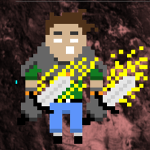

In [1]:
# ArcGIS for Developers ログイン情報
from arcgis.gis import GIS
import getpass

develoersUser = 'あなたのユーザー名'
develoersPass = getpass.getpass('ユーザー['+ develoersUser + ']のパスワード=')

gis = GIS("http://"+ develoersUser +".maps.arcgis.com/",develoersUser,develoersPass)
user = gis.users.get(develoersUser)
user

## 1.	ArcGIS オープンデータ で公開しているフィーチャ サービスを検索する

<Item title:"静岡県 行政界（H23）" type:Feature Layer Collection owner:ESRIJ_OpenData>
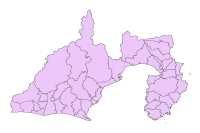

In [2]:
# 静岡県：静岡県-行政界（h23）を検索する：ArcGIS オープンデータから
shizuokaPolygonSearchList = gis.content.search("title:静岡県 行政界（H23） AND owner:ESRIJ_OpenData","Feature Layer", outside_org=True)
shizuokaPolygonSearchList[0]

<Item title:"静岡県 富士山ビューポイント" type:Feature Layer Collection owner:ESRIJ_OpenData>
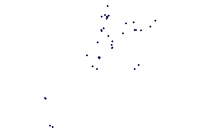

In [3]:
# 富士山のビューポイントを検索する：ArcGIS オープンデータから
MtFujiViewSearchList = gis.content.search("title:静岡県 富士山ビューポイント AND owner:ESRIJ_OpenData","Feature Layer", outside_org=True)
MtFujiViewSearchList[0]

## 2.	中心地とズームレベルを指定して地図を表示する

In [4]:
# 背景地図の表示
# 中心地名を第一引数に設定する（駅や有名な地名を文字列で入力できる。住所もOK）
FujiMap = gis.map(location='富士山', zoomlevel=10)
# 設定するベースマップを定義する：FujiMap.basemaps を実行すると、背景地図一覧を取得できる
FujiMap.basemap='satellite'
FujiMap

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oc…

#### 検索したレイヤーを追加する

In [5]:
# 静岡県 境界地ポリゴンの追加
FujiMap.add_layer(shizuokaPolygonSearchList[0])

In [6]:
# 富士山のビューポイントの追加
FujiMap.add_layer(MtFujiViewSearchList[0])

## 3.	Web マップとして保存する

In [7]:
# タイトルなどを定義する
web_map_properties = {'title':'富士山 ビューポイント マップ',
                      'snippet':'Python API による富士山ビュースポット Web マップ',
                      'tags':'test',
                      'extent':FujiMap.extent
                     }
web_map_properties

{'title': '富士山 ビューポイント マップ',
 'snippet': 'Python API による富士山ビュースポット Web マップ',
 'tags': 'test'}

In [8]:
# 保存する
newWebMap = FujiMap.save(item_properties=web_map_properties)
newWebMap

<Item title:"富士山 ビューポイント マップ" type:Web Map owner:ejpythondev>

#### 作成完了

## （応用）Web マップの定義を更新してポリゴンの透過設定とシンボルを変更する

静岡県のポリゴンの色とビューポイントのアイコンを変更します。

ポリゴンの色や透過度、シンボルの変更を行う一番簡単な方法は、今回使用したフィーチャ レイヤーの定義を変更することですが、**自分自身のデータでない場合は変更できません。**

そこで、Web マップの定義を変更することにします。
Web マップのデータも中身は JSON となっており、Web マップの背景地図や包含するレイヤーの情報が定義されています。

#### Web マップのレイヤーなどの定義情報を取得する

In [9]:
# レイヤーの定義を取得する
LayerData = newWebMap.get_data()

#### 静岡県のポリゴンのデータを透過する

In [10]:
# 静岡県境界のポリゴンの色を薄めにする
LayerData['operationalLayers'][0]['opacity']=0.25

#### ビューポイントレイヤーのシンボルを変更する

In [11]:
# View ポイントのアイコンを変更する
customSymbol ={
    "angle": 0,
    "xoffset": 0,
    "yoffset": 0,
    "type": "esriPMS",
    "url": "http://static.arcgis.com/images/Symbols/PeoplePlaces/Clue.png",
    "contentType": "image/png",
    "width": 39.75,
    "height": 39.75
}

In [12]:
# 描画情報(drawingInfo)を設定する
LayerData['operationalLayers'][1]['layerDefinition']['drawingInfo'] = {
    "renderer": {
    "type": "simple",
    "label": "",
    "description": "",
    "symbol": customSymbol
    }
}

#### Web マップの定義を更新する

<Item title:"富士山 ビューポイント マップ" type:Web Map owner:ejpythondev>
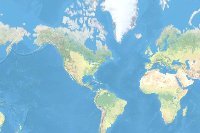

In [13]:
import json
newWebMap.update(data=json.dumps(LayerData))
newWebMap